# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [3]:
#Reading the dataset
import pandas as pd

df_bryant = pd.read_csv('./data/Bryant et al 2010.csv')
df_bryant

renew req %  Pricing  Cellulosic cost  Total biomass  \
0           0.25        1       124.900002     612.799988   
1           0.25        1        67.300003     837.200012   
2           0.25        1        71.000000     740.400024   
3           0.25        1        80.099998     995.599976   
4           0.25        1        76.400002     476.399994   
..           ...      ...              ...            ...   
877         0.25        1        99.199997     511.600006   
878         0.25        1       102.400002     751.400024   
879         0.25        1       100.000000     527.000000   
880         0.25        1       108.300003     694.200012   
881         0.25        1       121.099998     588.599976   

     Feedstock distribution  Cellulosic yield  Oil elasticity  \
0                      0.04         89.500000           0.206   
1                      0.18         95.900002           0.277   
2                      0.80         83.500000           0.445   
3                      0.58         82.400002           0.291   
4                      0.79         97.500000           0.443   
..                      ...               ...             ...   
877                    0.45         89.099998           0.363   
878                    0.91         86.800003           0.318   
879                    0.59         91.099998           0.410   
880                    0.65         99.800003           0.355   
881                    0.35         94.599998           0.283   

     Demand elasticity  Electricity coproduction  oil supply shift  \
0               -0.469                      1.83             0.078   
1               -0.380                      0.01            -0.032   
2               -0.778                      0.25            -0.093   
3               -0.334                      0.08            -0.086   
4               -0.205                      1.59             0.073   
..                 ...                       ...               ...   
877             -0.387                      1.75            -0.015   
878             -0.471                      0.75             0.023   
879             -0.567                      0.22             0.062   
880             -0.368                      1.62             0.017   
881             -0.332                      1.18            -0.007   

     Biomass backstop price  input record  Expen change  Incremental cost  \
0                162.199997          1001         60.00            276.47   
1                150.300003          1002         19.42             85.07   
2                135.800003          1003         17.76            200.11   
3                 98.800003          1004         37.88            130.86   
4                163.500000          1006         66.13            180.11   
..                      ...           ...           ...               ...   
877              170.500000          1995         74.22            265.56   
878               96.199997          1996         35.97            163.70   
879              137.100006          1997         35.96            200.64   
880              145.399994          1998         41.42            126.74   
881              124.300003          1999         62.17            207.96   

     Less than 10%  Greater than 90%  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 0  
4                0                 0  
..             ...               ...  
877              0                 0  
878              0                 0  
879              0                 0  
880              0                 0  
881              0                 0  

[882 rows x 16 columns]

In [4]:
#subsetting the dataset into columns of experiments and outcomes format for further analysis
experiments = df_bryant.iloc[:, 2:11]
outcome = df_bryant.iloc[:, 15]

In [5]:
#uncertainties or dimensions
experiments

Cellulosic cost  Total biomass  Feedstock distribution  Cellulosic yield  \
0         124.900002     612.799988                    0.04         89.500000   
1          67.300003     837.200012                    0.18         95.900002   
2          71.000000     740.400024                    0.80         83.500000   
3          80.099998     995.599976                    0.58         82.400002   
4          76.400002     476.399994                    0.79         97.500000   
..               ...            ...                     ...               ...   
877        99.199997     511.600006                    0.45         89.099998   
878       102.400002     751.400024                    0.91         86.800003   
879       100.000000     527.000000                    0.59         91.099998   
880       108.300003     694.200012                    0.65         99.800003   
881       121.099998     588.599976                    0.35         94.599998   

     Oil elasticity  Demand elasticity  Electricity coproduction  \
0             0.206             -0.469                      1.83   
1             0.277             -0.380                      0.01   
2             0.445             -0.778                      0.25   
3             0.291             -0.334                      0.08   
4             0.443             -0.205                      1.59   
..              ...                ...                       ...   
877           0.363             -0.387                      1.75   
878           0.318             -0.471                      0.75   
879           0.410             -0.567                      0.22   
880           0.355             -0.368                      1.62   
881           0.283             -0.332                      1.18   

     oil supply shift  Biomass backstop price  
0               0.078              162.199997  
1              -0.032              150.300003  
2              -0.093              135.800003  
3              -0.086               98.800003  
4               0.073              163.500000  
..                ...                     ...  
877            -0.015              170.500000  
878             0.023               96.199997  
879             0.062              137.100006  
880             0.017              145.399994  
881            -0.007              124.300003  

[882 rows x 9 columns]

In [6]:
#outcomes table is an array of 
outcome.head()
# print(outcome.unique())

0    0
1    0
2    0
3    0
4    0
Name: Greater than 90%, dtype: int64

In [9]:
%%time
import matplotlib.pyplot as plt
box_bryant.show_tradeoff()
plt.show()

CPU times: user 586 ms, sys: 88.3 ms, total: 674 ms
Wall time: 763 ms


In [46]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

x = experiments
y = outcome
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha = 0.1)
box_bryant = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


CPU times: user 12.3 s, sys: 460 ms, total: 12.8 s
Wall time: 14.6 s


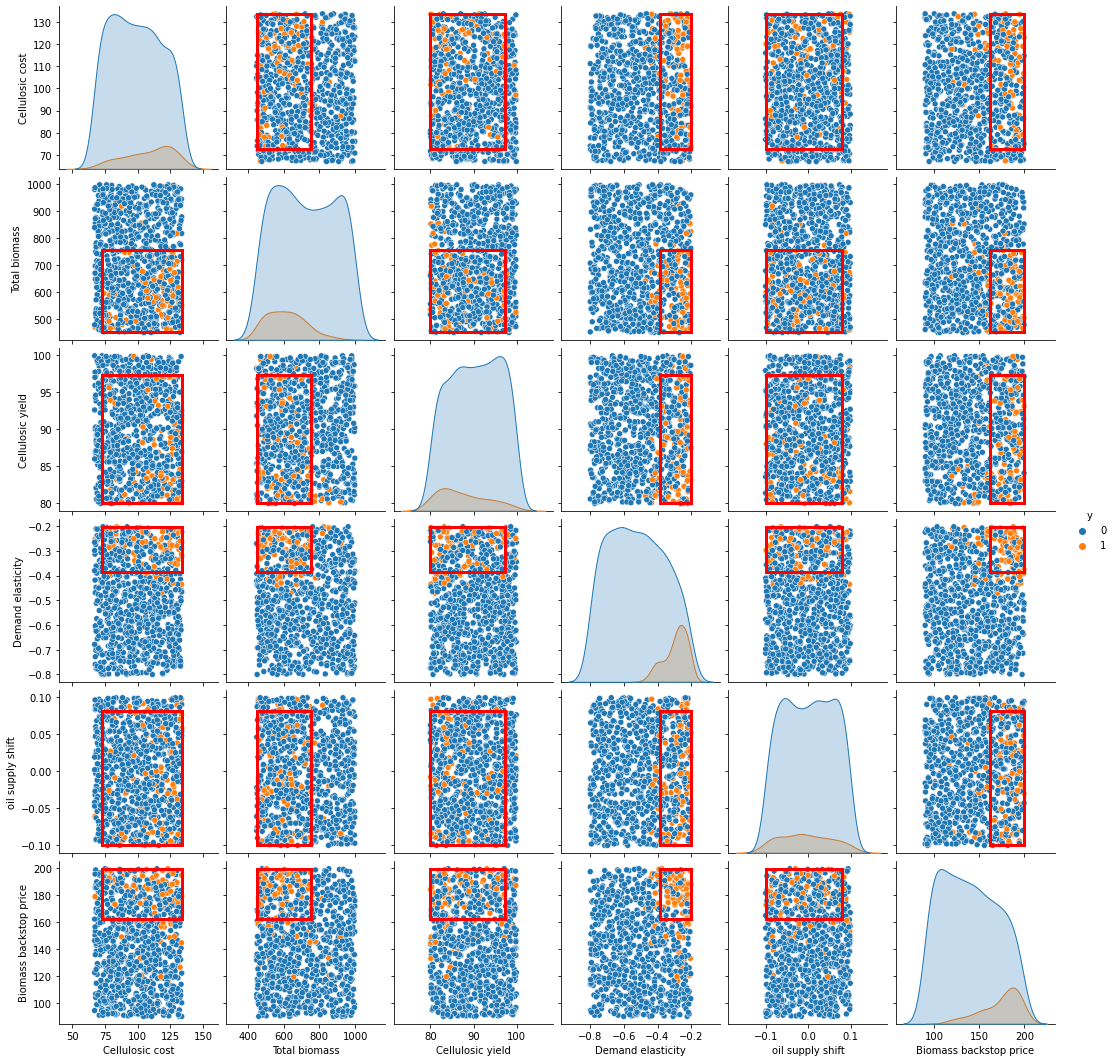

In [47]:
%%time
box_bryant.show_pairs_scatter()

In [48]:
# box1.inspect()

In [49]:
# box1.inspect_tradeoff()

box_bryant.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.730337
density     0.833333
id                22
mass        0.088435
mean        0.833333
res_dim            4
Name: 22, dtype: object

                            box 22                                           
                               min         max                      qp values
Total biomass           450.000000  755.799988  [-1.0, 3.975269312730579e-06]
Demand elasticity        -0.422000   -0.202000  [5.677298162579917e-18, -1.0]
Biomass backstop price  155.550003  199.600006   [7.74627840480414e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.1039150022362067, -1.0]



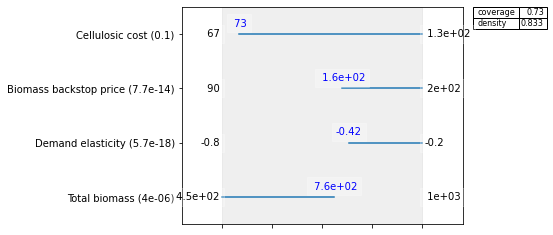

CPU times: user 530 ms, sys: 98.1 ms, total: 628 ms
Wall time: 1.16 s


In [38]:
%%time
box_bryant.inspect(22)
box_bryant.inspect(22, style='graph')
plt.show()

In [39]:
%%time
box2 = prim_alg.find_box()

[MainProcess/INFO] 837 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.05442176870748299, coverage: 0.30337078651685395, density: 0.5625 restricted_dimensions: 6
CPU times: user 2.74 s, sys: 57.1 ms, total: 2.8 s
Wall time: 6.34 s


In [40]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [14]:
import pandas as pd

df_rozenberg = pd.read_csv('./data/Rozenberg et al 2014.csv')

In [15]:
df_rozenberg

inequalities  convergence  population  behaviors  technologies  fossils  \
0               0            2           0          0             0        0   
1               0            2           0          0             0        0   
2               0            2           0          0             0        1   
3               0            2           0          0             0        1   
4               0            2           0          0             1        0   
..            ...          ...         ...        ...           ...      ...   
281             1            1           2          1             0        1   
282             1            1           2          1             1        0   
283             1            1           2          1             1        0   
284             1            1           2          1             1        1   
285             1            1           2          1             1        1   

     capital markets  SSP1  SSP2  SSP3  SSP4  SSP5  
0                  0     0     0     0     0     0  
1                  1     0     0     0     0     0  
2                  0     0     0     0     0     0  
3                  1     0     0     0     0     0  
4                  0     0     1     0     0     0  
..               ...   ...   ...   ...   ...   ...  
281                1     0     0     0     0     0  
282                0     1     0     0     0     0  
283                1     1     0     0     0     0  
284                0     0     0     0     0     0  
285                1     1     0     0     0     0  

[286 rows x 12 columns]

In [17]:
experiments_rozenberg = df_rozenberg.iloc[:, 0:7]
outcome_rozenberg = df_rozenberg.iloc[:, 7:12]

In [18]:
experiments_rozenberg

inequalities  convergence  population  behaviors  technologies  fossils  \
0               0            2           0          0             0        0   
1               0            2           0          0             0        0   
2               0            2           0          0             0        1   
3               0            2           0          0             0        1   
4               0            2           0          0             1        0   
..            ...          ...         ...        ...           ...      ...   
281             1            1           2          1             0        1   
282             1            1           2          1             1        0   
283             1            1           2          1             1        0   
284             1            1           2          1             1        1   
285             1            1           2          1             1        1   

     capital markets  
0                  0  
1                  1  
2                  0  
3                  1  
4                  0  
..               ...  
281                1  
282                0  
283                1  
284                0  
285                1  

[286 rows x 7 columns]

In [19]:
outcome_rozenberg

SSP1  SSP2  SSP3  SSP4  SSP5
0       0     0     0     0     0
1       0     0     0     0     0
2       0     0     0     0     0
3       0     0     0     0     0
4       0     1     0     0     0
..    ...   ...   ...   ...   ...
281     0     0     0     0     0
282     1     0     0     0     0
283     1     0     0     0     0
284     0     0     0     0     0
285     1     0     0     0     0

[286 rows x 5 columns]

In [52]:
from ema_workbench.analysis import prim

x = experiments_rozenberg
y = outcome_rozenberg['SSP1']
prim_alg = prim.Prim(x, y, threshold=0.6, peel_alpha = 0.5)
box_r1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


In [67]:
for SSP in outcome_rozenberg.columns.tolist():
   x = experiments_rozenberg
   y = outcome_rozenberg[SSP]   
   prim_alg = prim.Prim(x, y, threshold=0.6, peel_alpha = 0.5)

In [2]:
boxes = [ 'box_'+str(x) for SSP in outcome_rozenberg.columns.tolist()


SyntaxError: unexpected EOF while parsing (<ipython-input-2-c55fc41ca7ad>, line 1)

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)

In [ ]:
import pandas as pd

df = pd.read_csv('./data/Hamarat et al 2013/experiments.csv')

In [ ]:
df